#### Name Sidhantha Poddar
#### RegNo 17BCE2044

## Question

Clustering - Simulate AGNES and DIANA	


<p>
<strong>K-Means Clustering:</strong>
K means which classifies samples based on attributes/features into K number of clusters. Clustering or grouping of samples is done by minimizing the distance between sample and the centroid
<br><br>
<strong>Guassian Mixture Clustering:</strong>
Used when uncertain about the data points where they belong or to which group. It uses probability of a sample to determine the feasibility of it belonging to a cluster.
</p>

a comparitive analysis with plotting is done for K-means and Gaussian Mixture model by refering to the last plots we can concude visually that Kmeans outperforms GMM

In [12]:
%matplotlib inline
from copy import deepcopy 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

## Small artificially created dataset

In [1]:
import numpy as np
#Creating array of points given in the question
X = np.array([[2,10],[2,5], [8,4], [5,8], 
              [7,5], [6,4], [1,2], [4,9],])

In [6]:
data=pd.DataFrame(X)

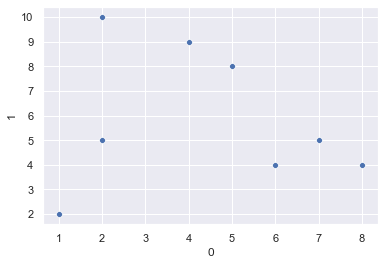

In [9]:
ax = sns.scatterplot(x=0, y=1, data=data)

### dendogram of sample dataset

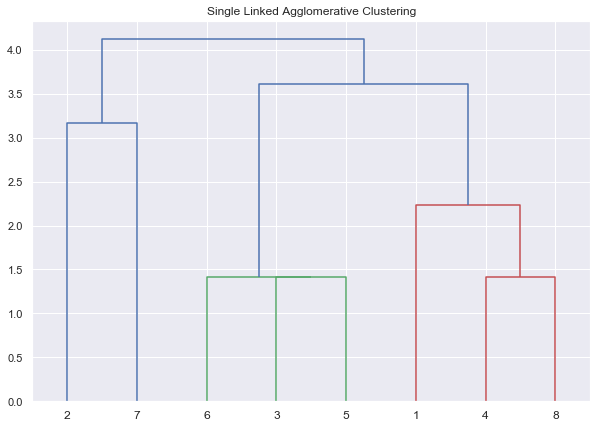

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 9)
plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top', 
           labels=labelList, 
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Single Linked Agglomerative Clustering')
plt.show() 

In [14]:
#Initializing KMeans
Agg = AgglomerativeClustering()
# Fitting with inputs
Agg = Agg.fit(data)
# Predicting the clusters
C=Agg.labels_

In [16]:
data['labels']=C

In [19]:
data.head

<bound method NDFrame.head of    0   1  labels
0  2  10       1
1  2   5       0
2  8   4       0
3  5   8       1
4  7   5       0
5  6   4       0
6  1   2       0
7  4   9       1>

### cluster 

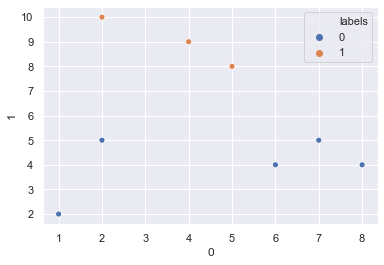

In [17]:
ax = sns.scatterplot(x=0, y=1, hue="labels", data=data)

### Stored the given value as cvs file

## Analysis Performed  in BMI Dataset

In [20]:
data = pd.read_csv('clustering.csv') 
print(data.shape)
data.head()

(500, 2)


,Weight,Height
0,67.06292,176.0864
1,68.80409,178.3887
2,60.93086,170.2845
3,59.73384,168.6920
4,65.43123,173.7637


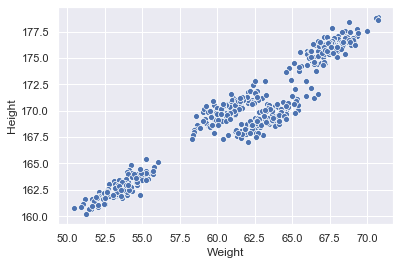

In [21]:
ax = sns.scatterplot(x="Weight", y="Height", data=data)

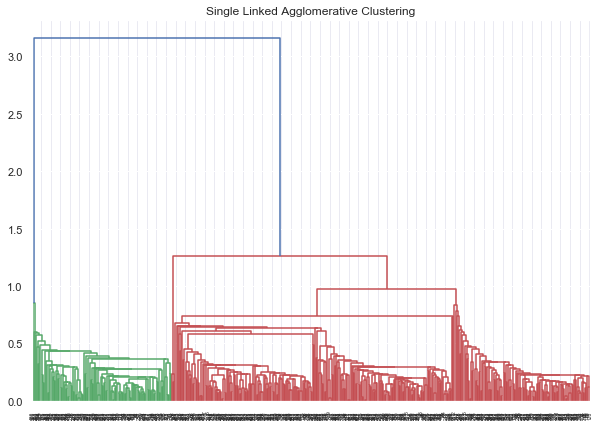

In [26]:
X=data.values
linked = linkage(X, 'single')
labelList = range(1, 501)
plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top', 
           labels=labelList, 
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Single Linked Agglomerative Clustering')
plt.show() 

## using 1/5th of the dataset

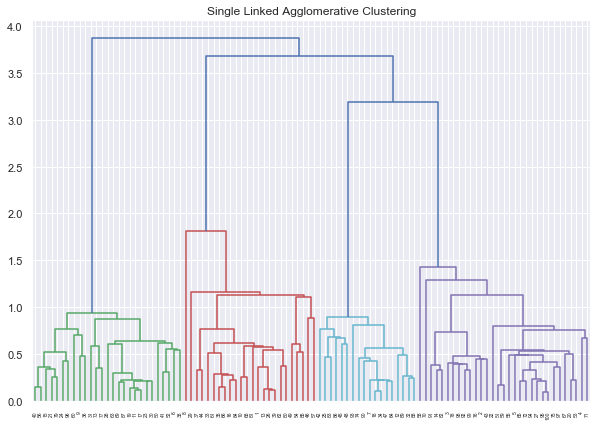

In [45]:
X=data.values[0:500:5]
linked = linkage(X, 'single')
labelList = range(1, 101)
plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top', 
           labels=labelList, 
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Single Linked Agglomerative Clustering')
plt.show() 

In [32]:
Agg = AgglomerativeClustering(n_clusters=4)
# Fitting with inputs(n_clusters=6
Agg = Agg.fit(data)
# Predicting the clusters
C=Agg.labels_
data['labels']=C
data

,Weight,Height,labels
0,67.06292,176.0864,2
1,68.80409,178.3887,2
2,60.93086,170.2845,0
3,59.73384,168.6920,0
4,65.43123,173.7637,2
...,...,...,...
495,59.97698,169.6797,0
496,66.42381,174.6256,2
497,53.60470,161.9192,1
498,50.43364,160.7949,1


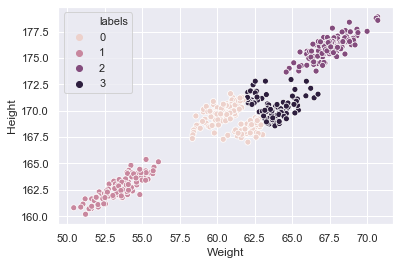

In [33]:
ax = sns.scatterplot(x="Weight", y="Height", hue="labels", data=data)

## Different types of linkage with 2 to 8 cluster 

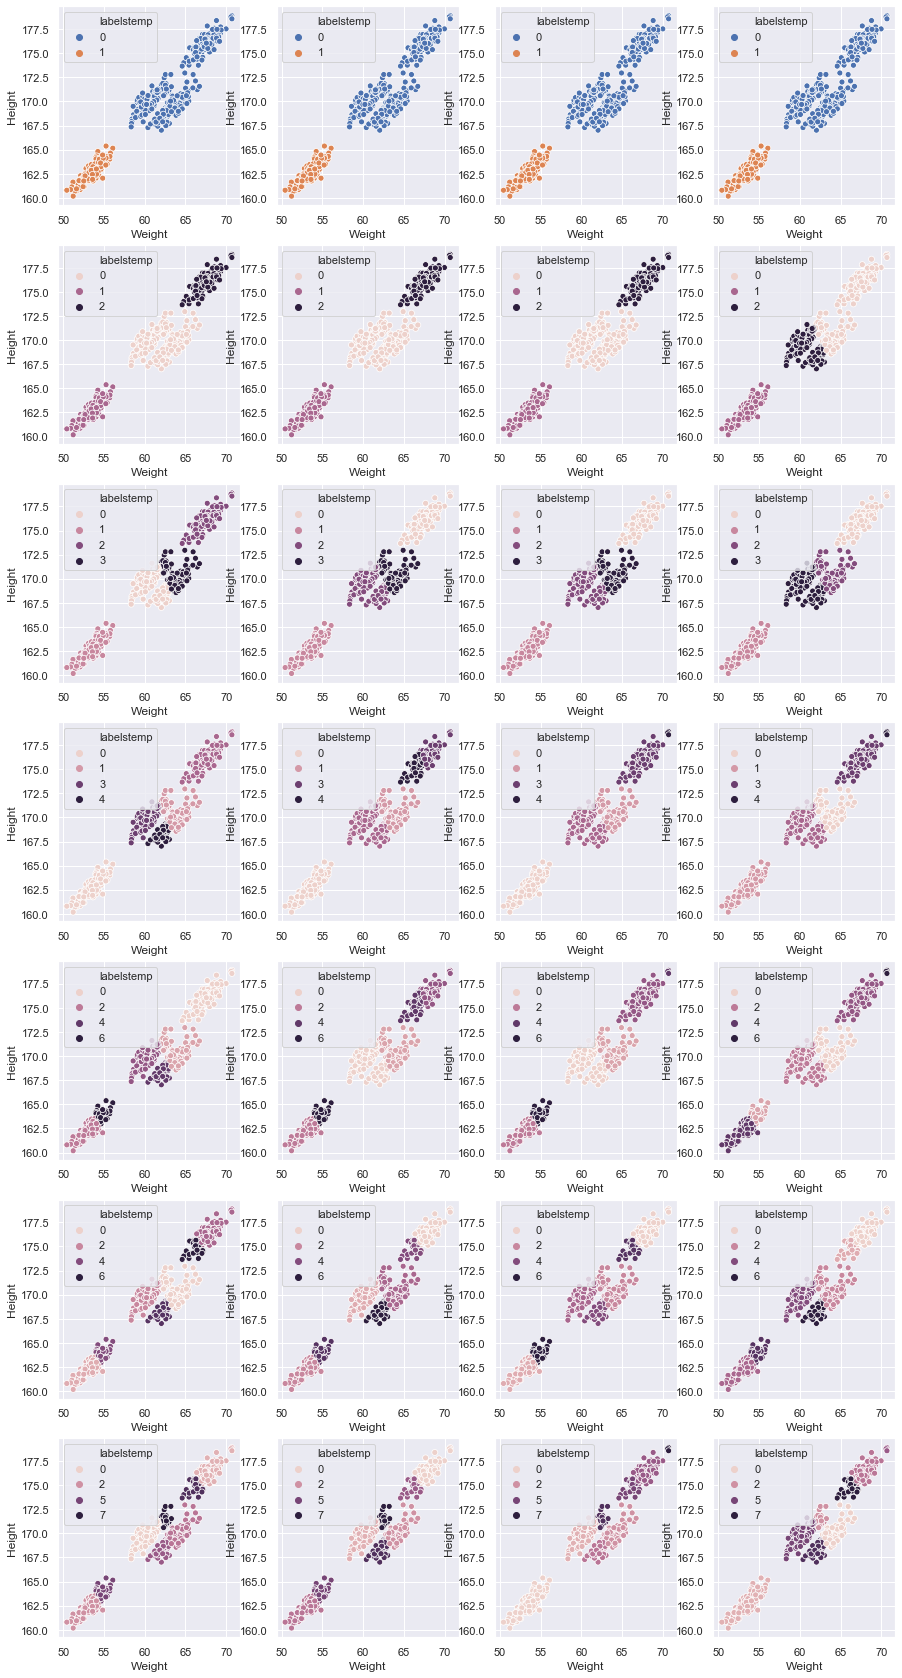

In [60]:

plt.figure(figsize=(15,30))
k=0
for i in range(2,9):
    for j in ["ward", "complete", "average", "single"]:
        k+=1
        plt.subplot(7,4,k)
        Agg = AgglomerativeClustering(n_clusters=i,linkage=j)
        # Fitting with inputs(n_clusters=6
        Agg = Agg.fit(data)
        # Predicting the clusters
        C=Agg.labels_
        data['labelstemp']=C
        ax = sns.scatterplot(x="Weight", y="Height", hue="labelstemp",data=data)